
<center> TRABAJO FINAL PROCESAMIENTO DIGITAL DE SEÑALES <center> 
 <center> AUTENTICACIÓN POR MEDIO DE VOZ
 <center> JAIDIVER GÓMEZ QUINTERO
 <center> 2023-1


### Introducción

Se requiere elaborar un autenticador de señales de voz.  Se crea un audio con la contraseña y dos audios con sus posibles intentos 1 y 2, se analiza cada una de las señales por medio de la correlación cruzada y la transformada de Fourier para determinar si los intentos coinciden con la contraseña establecida. La autenticación de voz en casos generales  es algo complejo y se requieren otros análisis pero los mencionados son indispensables y dan indicios significativos en la autenticación.

<u>La transformada de Fourier</u> se utiliza para analizar y descomponer una señal de voz en sus componentes de frecuencia. Esta transformada convierte una señal del tiempo al dominio de la frecuencia. En este caso es utilizada para extraer los picos de las frecuencias fundamentales de la voz que se usan como huellas digitales para determinar si es la misma persona la que está hablando.

 <u>La correlación cruzada</u>, por otro lado, se utiliza para comparar las señales y determinar su grado de similitud. En este caso la correlación cruzada se emplea para comparar la señal 1 con la 2-3 y evaluar cuánto se parecen y confirmar si provienen de la misma persona.

<u>Filtros FIR</u>, es necesario pasar las señales por filtros pasabajas FIR para eliminar ruido e información irrelevante y poder realizar un mejor análisis de las señales, esto implica un buen diseño ya que se puede ver afectada la calidad de la señal de muchas formas.
En el momento de diseño es necesario tener en cuenta el orden del filtro y el tipo de enventanado según la tabla a continuación.

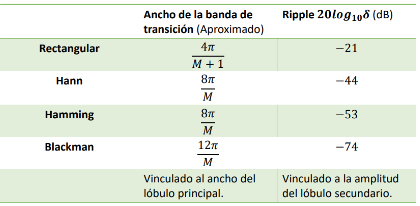

### Desarrollo



#### 1. Carga de señales.

* 1.1  Cargar las 2 señales de audio que contienen las posibles contraseñas de voz "intento1.wap" y "intento2.wap"y la señal de voz ya definida como contraseña "contraseña.wap", Grafiquelas y reproduzcalas.
 
* 1.2 Asegúrar que los archivos de audio tengan la misma frecuencia de muestreo.


In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy.signal as signal
import soundfile as sf
from scipy.fftpack import fft
from scipy.signal import firwin, freqz, impulse, lfilter


# Función para calcular la correlación cruzada entre dos señales
def cross_correlation(signal1, signal2):
    # Asegurarse de que las señales tengan la misma longitud
    min_len = min(len(signal1), len(signal2))
    signal1 = signal1[:min_len]
    signal2 = signal2[:min_len]

    # Calcular la correlación cruzada
    correlation = np.correlate(signal1, signal2, mode='same')

    return correlation

# Función para calcular la frecuencia fundamental de una señal
def get_fundamental_frequency(signal, fs):
    # Aplicar transformada de Fourier a la señal
    spectrum = np.abs(fft(signal))

    # Encontrar el índice de la frecuencia dominante (exceptuando la componente DC)
    index = np.argmax(spectrum[1:]) + 1

    # Calcular la frecuencia fundamental correspondiente al índice
    fundamental_frequency = index * fs / len(signal)

    return fundamental_frequency

La frecuencia de muestreo es: 8000 Hz


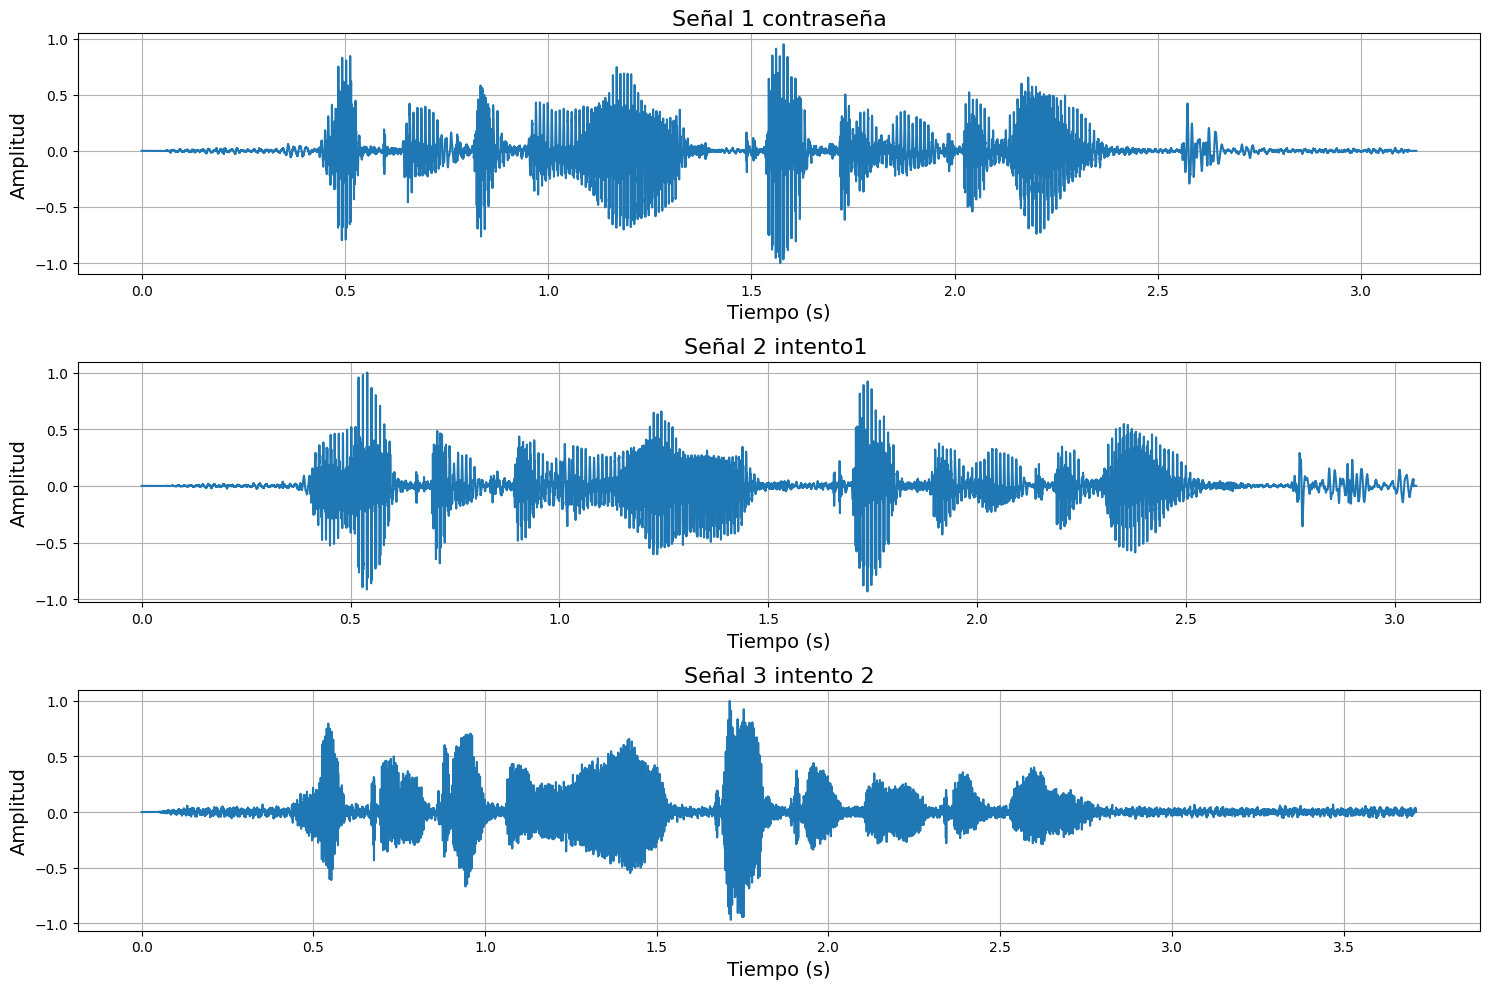

In [2]:

# Cargar las tres señales de audio
audio_file1 = 'contraseña.wav'
audio_file2 = 'intento1.wav'
audio_file3 = 'intento2.wav'

signal1, fs1 = sf.read(audio_file1)
signal2, fs2 = sf.read(audio_file2)
signal3, fs3 = sf.read(audio_file3)
print("La frecuencia de muestreo es:",fs1,"Hz")

# Normalizar las señales
signal1 = signal1 / np.max(np.abs(signal1))
signal2 = signal2 / np.max(np.abs(signal2))
signal3 = signal3 / np.max(np.abs(signal3))

# Crear vectores de tiempo
t1 = np.arange(0, len(signal1) / fs1, 1 / fs1)
t2 = np.arange(0, len(signal2) / fs2, 1 / fs2)
t3 = np.arange(0, len(signal3) / fs3, 1 / fs3)

# Configurar el tamaño y diseño de la figura
plt.figure(figsize=(15, 10))

# Graficar la señal 1
plt.subplot(3, 1, 1)
plt.plot(t1, signal1)
plt.title("Señal 1 contraseña", fontsize=16)
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid()

# Graficar la señal 2
plt.subplot(3, 1, 2)
plt.plot(t2, signal2)
plt.title("Señal 2 intento1 ", fontsize=16)
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid()

# Graficar la señal 3
plt.subplot(3, 1, 3)
plt.plot(t3, signal3)
plt.title("Señal 3 intento 2", fontsize=16)
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Amplitud", fontsize=14)
plt.grid()

# Ajustar el espaciado entre las subplots
plt.tight_layout()




In [3]:
# Reproducir las señales de audio
Audio(signal1, rate=fs1)

In [4]:
Audio(signal2, rate=fs2)


In [5]:
Audio(signal3, rate=fs3)

In [6]:
#1.2
# Verificar si las señales tienen la misma frecuencia de muestreo
if fs1 != fs2:
    print("Las señales tienen diferentes frecuencias de muestreo. No se pueden comparar.")
else:
    print("Las señales tienen igual frecuencias de muestreo. CONTINUE")


Las señales tienen igual frecuencias de muestreo. CONTINUE


#### 2. Diseño y aplicación de filtro FIR pasa-bajas.

* 2.1 Diseñe un filtro FIR pasabajas usando la funcion firwin de scipy.signal, con frecuencia de corte 2khz, frecuencia de muestreo encontrada, ripple 0.004, Ancho de banda de transción 300 Hz.
* 2.2 Especifique cual es el orden adecuado del filtro y ventana ¿por qué?.

Se diseñó el filtro y se encontro el orden según las siguientes formulas:

\begin{equation}
\delta dB = 20\log_{10}(0.004)= -48dB
\end{equation}

Se tiene un ripple 0.4% que serian -48dB, Teniendo en cuenta la tabla de la guia, la mejor opción para la ventana es Hamming porque es la más se aproxima hacia abajo.

El orden del filtro deberia ser:

\begin{equation}
N > \frac{4Fs}{\Delta Fm}  = N > \frac{4\times 8000Hz}{\ 300Hz} = N > 106
\end{equation}

Se escoge 107 para facilitar análisis en simetría.

* 2.3 Varíe el orden del filtro por uno menor y mayor, grafique la respuesta en frecuencia de cada uno en gráficas separadas ¿qué puede concluir?.
* 2.4 Con el orden del filtro encontrado varie el tipo de enventanado, escogiendo uno por encima y otro por debajo al encontrado en el metodo análitico, grafique en 1 sola gráfica las tres gráficas.
* 2.5 Aplique el filtro adecuado a las señales de audio, grafique y escuche ¿qué observa?.

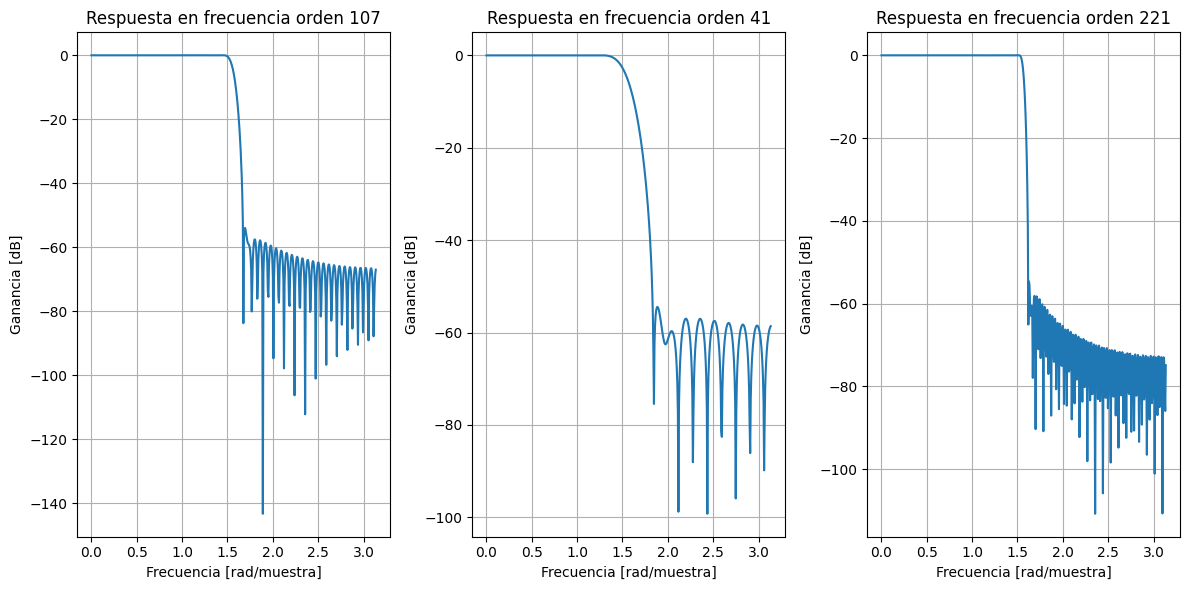

In [7]:
#2.3
# Parámetros del filtro
order_range = [106, 40, 220]  # Diferentes órdenes del filtro
cutoff_freq = 2000  # Frecuencia de corte del filtro
fs = 8000  # Frecuencia de muestreo
window = 'hamming'  # Tipo de ventana

# Crear figura
plt.figure(figsize=(12, 6))

# Graficar la respuesta en frecuencia para cada orden del filtro
for i, order in enumerate(order_range):
    # Diseñar el filtro
    b = firwin(order + 1, cutoff_freq, fs=fs, pass_zero='lowpass', window=window)
    
    # Calcular la respuesta en frecuencia
    w, h = freqz(b)
    
    # Graficar la respuesta en frecuencia
    plt.subplot(1, 3, i+1)
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.title(f"Respuesta en frecuencia orden {order + 1}")
    plt.xlabel('Frecuencia [rad/muestra]')
    plt.ylabel('Ganancia [dB]')
    plt.grid(True)

# Ajustar espaciado entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

2.3 Cuando se tiene un orden más pequeño que el ideal, este puede tener una capacidad limitada para atenuar las frecuencias no deseadas a partir de la frecuencia de corte. Esto significa que puede haber una menor supresión de componentes no deseados en la señal de entrada y el ancho de banda de transición (roll-off) sea más amplio implicando que las frecuencias cercanas a la frecuencia de corte pueden no estar suficientemente atenuadas, lo que puede afectar la selectividad del filtro.

Con el filtro con un orden muy mayor se observa todo lo contrario un roll-off más pronunciado, lo que indica una mayor capacidad de supresión de frecuencias no deseadas fuera de la banda de paso del filtro PERO  Los filtros de orden muy alto pueden volverse más susceptibles a problemas de estabilidad y requieren muchisima más complejidad computacional.

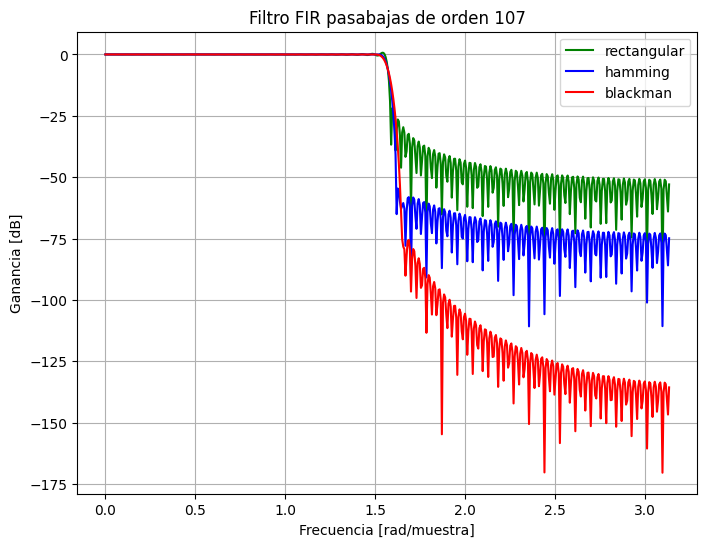

In [8]:
#2.4
window_types = ['rectangular', 'hamming', 'blackman']
colors = ['g', 'b', 'r']
plt.figure(figsize=(8, 6))

for i, window_type in enumerate(window_types):
    b_v = firwin(order + 1, cutoff_freq, fs=fs, pass_zero='lowpass', window=window_type)
    w_v, h_v = freqz(b_v)
    plt.plot(w_v, 20 * np.log10(abs(h_v)), colors[i], label=window_type)

# Configurar la leyenda y los ejes
plt.title(f"Filtro FIR pasabajas de orden 107")
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Ganancia [dB]')
plt.grid(True)
plt.legend()
plt.show()

Cada ventana tiene diferentes características de atenuación de las frecuencias laterales y de transición. Por ejemplo, la ventana rectangular no introduce significativa atenuación en las frecuencias laterales, mientras que las ventanas de Hamming y Blackman proporcionan una mayor atenuación, siendo la ventana Blackman quien tiene la mayor atenuación en general. 

Aunuque los dos últimos eventanamiento sastifase las necesidades del problema, con la Hamming es suficiente ya que la Blackman aunque es más precisa con la atenuación de los lóbulos laterales, implica un sobrecosto de ingenieria innecesario para resolver éste problema.

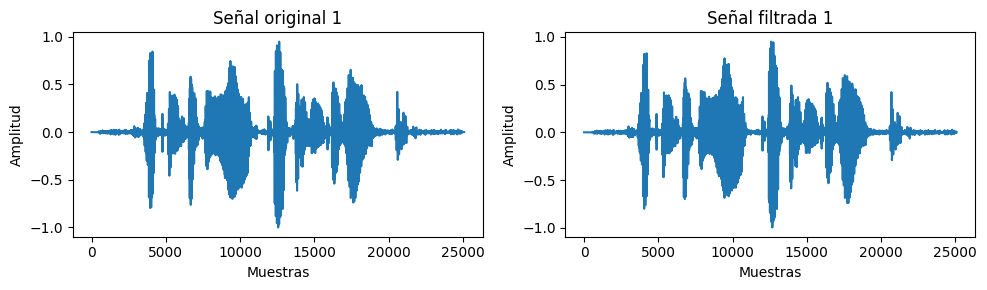

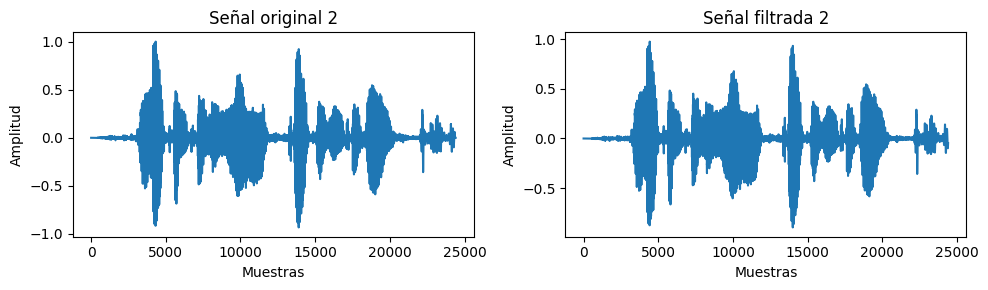

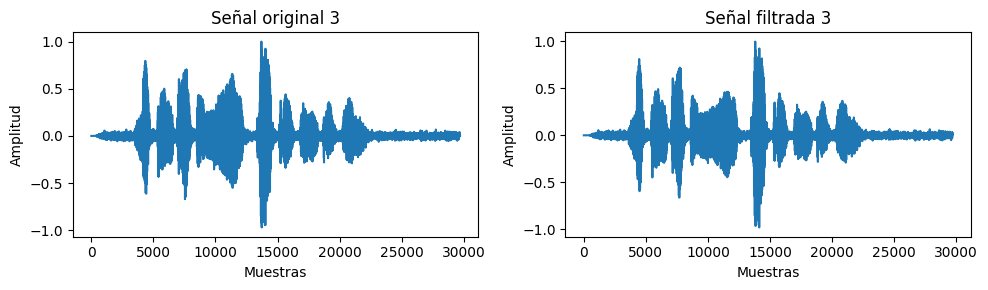

In [9]:
# 2.5
# Aplicar el filtro adecuado a la primera señal
filtered_signal1 = lfilter(b, 1, signal1)

# Graficar la primera señal original y filtrada
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(signal1)
plt.title('Señal original 1')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 2, 2)
plt.plot(filtered_signal1)
plt.title('Señal filtrada 1')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Aplicar el filtro a la segunda señal
filtered_signal2 = lfilter(b, 1, signal2)

# Graficar la segunda señal original y filtrada
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(signal2)
plt.title('Señal original 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 2, 2)
plt.plot(filtered_signal2)
plt.title('Señal filtrada 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# Aplicar el filtro a la tercera señal
filtered_signal3 = lfilter(b, 1, signal3)

# Graficar la tercera señal original y filtrada
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(signal3)
plt.title('Señal original 3')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 2, 2)
plt.plot(filtered_signal3)
plt.title('Señal filtrada 3')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

In [10]:
# Reproducir las señales de audio
Audio(filtered_signal1, rate=fs1)

In [11]:
# Reproducir las señales de audio
Audio(filtered_signal2, rate=fs2)

In [12]:
# Reproducir las señales de audio
Audio(filtered_signal3, rate=fs3)

En las graficas anteriores, muestras en el tiempo, No se logra visualizar muy bien en que se modifica la señal al pasar por el filtro, pero en los audios si se logra esuchar la señal con menor ruido.

Como no se logró apreciar mucho la reducción del ruido o frecuencias no deseadas por lo menos visualmente, se utiliza otras técnicas para visualizar mejor el analisis como la transformada de Fourier.

#### 3. Transformada de Fourier

* 3.1 Aplicar la transformada de Fourier a cada señal de audio filtrada y sin filtrar para obtener su espectro de frecuencia,Grafique cada uno, ¿que observa?.

* 3.2 Identificar las frecuencias fundamentales dominantes en cada espectro de frecuencia. Esto implica encontrar los picos más altos en el espectro que representan las frecuencias principales presentes en la señal de audio.

* 3.3 Comparar las frecuencias fundamentales de ambas señales para determinar su similitud, para eso calcula la diferencia entre las frecuencias fundamentales para que con el umbral definido se determine si son lo suficientemente cercanas como para considerarlas similares.

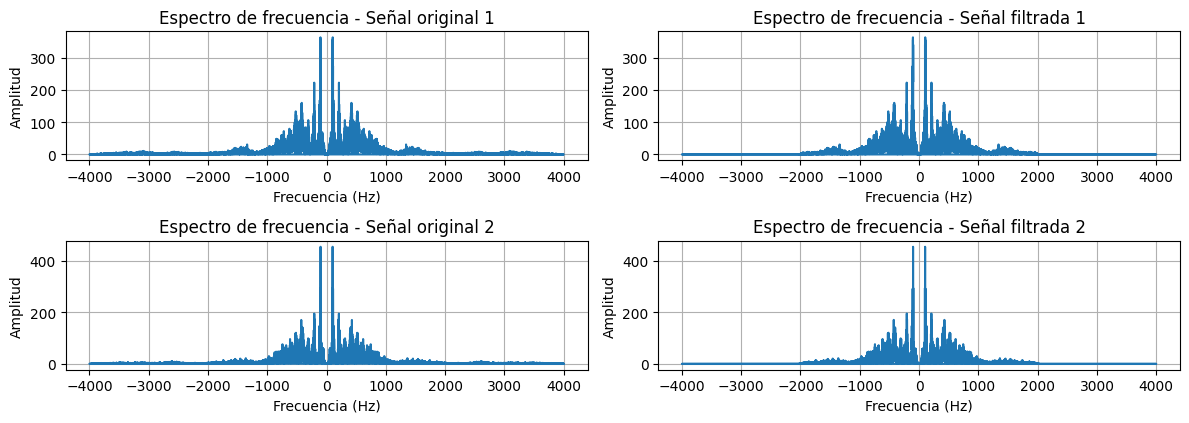

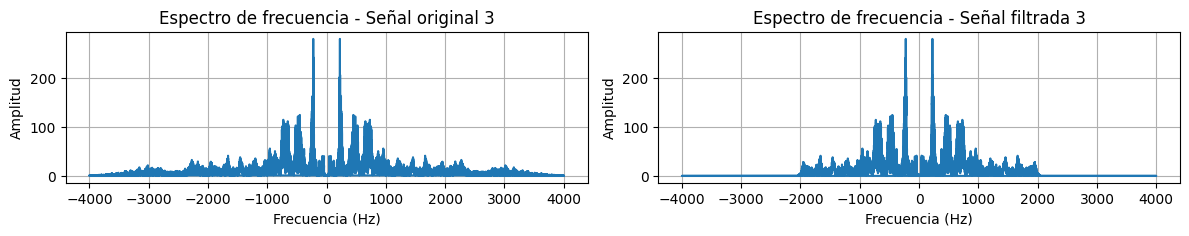

In [13]:
#3.1
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Aplicar la transformada de Fourier a la primera señal original
spectrum1_orig = np.abs(fft(signal1))
freq1_orig = np.fft.fftfreq(len(signal1)) * fs1

# Aplicar la transformada de Fourier a la primera señal filtrada
spectrum1_filt = np.abs(fft(filtered_signal1))
freq1_filt = np.fft.fftfreq(len(filtered_signal1)) * fs1

# Graficar el espectro de frecuencia de la primera señal original y filtrada
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.plot(freq1_orig, spectrum1_orig)
plt.title('Espectro de frecuencia - Señal original 1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(freq1_filt, spectrum1_filt)
plt.title('Espectro de frecuencia - Señal filtrada 1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

# Aplicar la transformada de Fourier a la segunda señal original
spectrum2_orig = np.abs(fft(signal2))
freq2_orig = np.fft.fftfreq(len(signal2)) * fs2

# Aplicar la transformada de Fourier a la segunda señal filtrada
spectrum2_filt = np.abs(fft(filtered_signal2))
freq2_filt = np.fft.fftfreq(len(filtered_signal2)) * fs2

# Graficar el espectro de frecuencia de la segunda señal original y filtrada
plt.subplot(3, 2, 3)
plt.plot(freq2_orig, spectrum2_orig)
plt.title('Espectro de frecuencia - Señal original 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(freq2_filt, spectrum2_filt)
plt.title('Espectro de frecuencia - Señal filtrada 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Aplicar la transformada de Fourier a la segunda señal original
spectrum3_orig = np.abs(fft(signal3))
freq3_orig = np.fft.fftfreq(len(signal3)) * fs3

# Aplicar la transformada de Fourier a la segunda señal filtrada
spectrum3_filt = np.abs(fft(filtered_signal3))
freq3_filt = np.fft.fftfreq(len(filtered_signal3)) * fs3

# Graficar el espectro de frecuencia de la segunda señal original y filtrada
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 5)
plt.plot(freq3_orig, spectrum3_orig)
plt.title('Espectro de frecuencia - Señal original 3')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(freq3_filt, spectrum3_filt)
plt.title('Espectro de frecuencia - Señal filtrada 3')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

Ahora si se puede observar que cuando se realiza el analisís en frecuencia es posible ver como el filtro atenua los lobulos laterales, cosa que era muy complejo en el análisis temporal, además se observa que la señal 1 y 3 tienen picos en frecuencia muy similares en comparación de la señal 3.

In [14]:
#3.2
fundamental_frequency1 = get_fundamental_frequency(filtered_signal1, fs1)
fundamental_frequency2 = get_fundamental_frequency(filtered_signal2, fs2)
fundamental_frequency3 = get_fundamental_frequency(filtered_signal3, fs3)
print("frecuencia fundamental 1", fundamental_frequency1)
print("frecuencia fundamental 2",fundamental_frequency2)
print( "frecuencia fundamental 3",fundamental_frequency3)

frecuencia fundamental 1 103.63520408163265
frecuencia fundamental 2 101.61435712529706
frecuencia fundamental 3 224.67672413793105


In [15]:
#3.3
# Calcular el coeficiente de similitud mediante las frecuencias fundamentales
similarity_fundamental1 = 1 / np.abs(fundamental_frequency1 - fundamental_frequency2)
similarity_fundamental2 = 1 / np.abs(fundamental_frequency1 - fundamental_frequency3)
print("similaridad 1-2",similarity_fundamental1)
print("similaridad 1-3",similarity_fundamental2)

similaridad 1-2 0.49484202495636015
similaridad 1-3 0.008261627906976743


#### 4. Correlación cruzada
4.1 Calcular la correlación cruzada entre las formas de onda de las señales de audio filtrada, "contraseña1 y 2" respecto a “contraseñareal", Grafique ¿qué puede concluir?. 

4.2 Obtener una medida de similitud a partir de la correlación cruzada. La similitud indica qué tan relacionadas están las dos señales de audio.


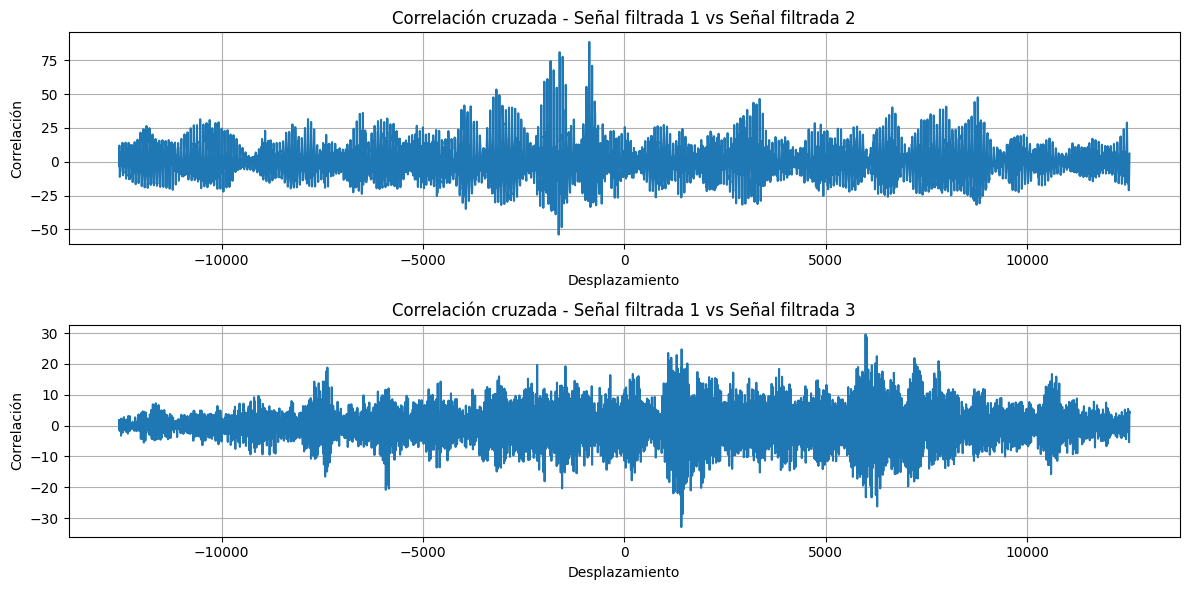

In [16]:
#4.1
import numpy as np
from scipy.signal import correlate

# Calcular la correlación cruzada entre la señal filtrada 1 y la señal filtrada 2
cross_correlation_12 = correlate(filtered_signal1, filtered_signal2, mode='same')

# Calcular la correlación cruzada entre la señal filtrada 1 y la señal filtrada 3
cross_correlation_13 = correlate(filtered_signal1, filtered_signal3, mode='same')

# Crear vector de desplazamientos
desplazamiento = np.arange(-len(filtered_signal1)//2, len(filtered_signal1)//2)

# Graficar la correlación cruzada de la señal filtrada 1 con la señal filtrada 2
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(desplazamiento, cross_correlation_12)
plt.title('Correlación cruzada - Señal filtrada 1 vs Señal filtrada 2')
plt.xlabel('Desplazamiento')
plt.ylabel('Correlación')
plt.grid(True)

# Graficar la correlación cruzada de la señal filtrada 1 con la señal filtrada 3
plt.subplot(2, 1, 2)
plt.plot(desplazamiento, cross_correlation_13)
plt.title('Correlación cruzada - Señal filtrada 1 vs Señal filtrada 3')
plt.xlabel('Desplazamiento')
plt.ylabel('Correlación')
plt.grid(True)

plt.tight_layout()
plt.show()

La correlación cruzada entre la señal filtrada 1 y la señal filtrada 2 muestra el grado de similitud o coincidencia entre ambas señales. Si la correlación muestra picos altos en que superan los 75 y los demás al rededor de los 30, significa que hay una coincidencia temporal entre las dos señales en esos puntos, considerandose bastante similitud en comparación con la grafica de correlación entre las señal 1 y 3 donde sus picos no suben por encima de los 30 indicando muy poca similitud.

In [17]:
#4.2
# Coeficiente de similitud mediante la correlación cruzada
similarity_cross_correlation_12 = np.max(cross_correlation_12)/100
similarity_cross_correlation_13 = np.max(cross_correlation_13)/100
print("La similitud 1-2 es", similarity_cross_correlation_12, "La similitud 1-3 es", similarity_cross_correlation_13)

La similitud 1-2 es 0.8865111085287832 La similitud 1-3 es 0.2954617737879444


#### 5. Comparación de frecuencias fundamentales y la medida de similitud

Combinar la comparación de frecuencias fundamentales y la medida de similitud para determinar si las señales de audio corresponden a la misma contraseña de voz. Si ambas características superan los umbrales establecidos, se considera que las señales son similares y se indica que la contraseña de voz es correcta.

In [18]:
#5
# Definir un umbral de similitud para determinar si las señales son iguales
similarity_threshold = 0.7
similarity_threshold2 = 0.4 # Umbral de las frecuencias fudamentales
# Comparar la similitud con el umbral utilizando ambas métricas
if similarity_cross_correlation_12 >= similarity_threshold and similarity_fundamental1 >= similarity_threshold2:
    print("AUTENTICACIÓN VALIDA, La contraseña coincide con el intento 1")
else:
    print("La contraseña NO coincide con el intento 1.")

if similarity_cross_correlation_13 >= similarity_threshold and similarity_fundamental2 >= similarity_threshold2:
    print("AUTENTICACIÓN VALIDA, La contraseña coincide con el intento 2.")
else:
    print("La contraseña NO coincide con el intento 2.")

AUTENTICACIÓN VALIDA, La contraseña coincide con el intento 1
La contraseña NO coincide con el intento 2.


##### CONCLUSIONES

* Los filtros pasabajas son indispensables en el análisis de señales de voz ya que permiten eliminar ruido de la señal pero el diseño debe ser cuidadoso ya que porque este puede influir en la calidad de la señal, por ejemplo en esta practica se analizaron diferentes resultados al variar el orden del filtro con un número mayor y menor, observando que en cada uno involucra supresion de los lobulos laterales y roll-off diferentes.


* La forma y amplitud de las correlaciones cruzadas pueden proporcionar información sobre el grado de sincronización o similitud entre las señales. Los picos prominentes en la correlación cruzada, indican una alta similitud o coincidencia en esos puntos de desplazamiento, indicando que la señal 1 y 2 eran mucho más similares que la señal 1 y 3.


* La Transformada de Fourier fue de gran ayuda para analizar las señales y así poder determinar la frecuencia fundamental de cada señal, en este caso se encontró que la frecuencia fundamental de la voz 1 y 2 eran muy similares aproximadamente 103 HZ lo que confirma que es una voz de hombre adulto y la voz de la señal 3 de una mujer ya que su frecuencia fundamental supera los 200Hz.


* Realizar la autentificación de voz puede ser un tema complejo ya que se necesita analizar muchos más parametros dependiendo de las señales de voz a analizar para ser mucho más efectivos, pero la correlación cruzada y la transformada de Fourier son herramientas indispensables para el análisis, generando en este caso la correcta autentificación de la señal 1 y 2.
